In [1]:
import keras
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Sequential
np.random.seed(42)

Using TensorFlow backend.


In [2]:
#load model
model = load_model('weights-of-autoencoder-snowy.h5')
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         2312      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 8)      

In [9]:
SIZE=128
path1='C:/Users/User/Desktop/test'
sorted_list_noisy=[]
finall_list_noisy=[]
noisy_data=[]

for f in os.listdir(path1):
    file_name,file_ext=os.path.splitext(f)
    sorted_list_noisy.append(file_name)
sorted_list_noisy.sort()

for f in sorted_list_noisy:
    f=f+'.png'
    finall_list_noisy.append(f)

for i in finall_list_noisy:
    img=cv2.imread(path1+"/"+i,1)
    try:
        img=cv2.resize(img,(SIZE,SIZE))
    except cv2.error as e:
        print('Invalid frame!')
    noisy_data.append(img)    
print(len(noisy_data))

2


In [10]:
noisy_test=np.reshape(noisy_data,(len(noisy_data),SIZE,SIZE,3))
noisy_test=noisy_test.astype('float32')/255.0
print(noisy_test.shape)

(2, 128, 128, 3)


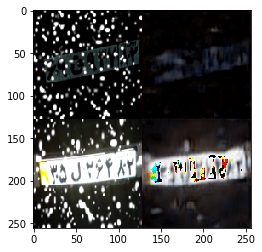

In [12]:
pred= model.predict(noisy_test)
outputs = None

for i in range(0,pred.shape[0]):
    recon = (pred[i]*255).astype("uint8")
    original = (noisy_test[i]*255).astype("uint8")
    output = np.hstack([original, recon])
    if outputs is None:
        outputs = output
    else:
        outputs = np.vstack([outputs, output])

cv2.imwrite("paper-results1.png", outputs)
cv2.imwrite("res.png",recon)
plt.imshow(outputs,cmap='binary')